# JSO Machine Learning Miniproject

For this project 

In [9]:
#Libraries
#Visualisation and data management
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
#Linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

🔢 
# Load the dataset from kaggle in the local folder
Using Pandas we load the complete dataset into a master datafram in which we can pull whatever data wee need.

In [2]:
dfMaster = pd.read_csv('daily_weather_data.csv')
dfMaster.dropna(inplace=True)
dfMaster.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


🔢
# Copy data
The needed data is copied onto a new dataframe and reset so the new dataframe begins at 0 and not whatever data entry point the needed data started at.
This means that instead of starting at 36356 we begin at 0. 

In [3]:
#Create a variable containing "Denmark" and pass it into the ".isin" function and copy any values matching into dfDenmark dataframe
values=['Denmark']
dfDenmark = (dfMaster[dfMaster["country"].isin(values)] )
#We reset the dataframe so the frame will begin at 0 and not where the needed data is placed in the csv file
dfDenmark.reset_index(drop=True, inplace=True)
dfDenmark.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,01-01-2018,Denmark,Copenhagen,55.676097,12.568337,5.6,4.5,6.8,213.0,27.5,992.5
1,02-01-2018,Denmark,Copenhagen,55.676097,12.568337,4.3,3.7,5.0,222.0,17.0,1001.7
2,03-01-2018,Denmark,Copenhagen,55.676097,12.568337,4.1,2.0,5.2,166.0,27.2,985.2
3,04-01-2018,Denmark,Copenhagen,55.676097,12.568337,2.5,1.2,3.9,240.0,12.2,986.7
4,05-01-2018,Denmark,Copenhagen,55.676097,12.568337,2.7,1.9,3.4,338.0,11.4,990.5


🔢
# Remove NaN values
By removing NaN values we ensure that they do not add to the model with bad data.

In [4]:
dfDenmark.dropna(inplace=True)
dfDenmark.head()

C:\Users\Anders\AppData\Local\Temp\ipykernel_12232\1775645918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDenmark.dropna(inplace=True)


,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,01-01-2018,Denmark,Copenhagen,55.676097,12.568337,5.6,4.5,6.8,213.0,27.5,992.5
1,02-01-2018,Denmark,Copenhagen,55.676097,12.568337,4.3,3.7,5.0,222.0,17.0,1001.7
2,03-01-2018,Denmark,Copenhagen,55.676097,12.568337,4.1,2.0,5.2,166.0,27.2,985.2
3,04-01-2018,Denmark,Copenhagen,55.676097,12.568337,2.5,1.2,3.9,240.0,12.2,986.7
4,05-01-2018,Denmark,Copenhagen,55.676097,12.568337,2.7,1.9,3.4,338.0,11.4,990.5


🔢
# Correlation matrix
We create a correlationmatrix to see the correlation between different labels. Note that longitude, lattitude and date still are a part of the dataframe. But we are only interested in the labels that makes sense.

C:\Users\Anders\AppData\Local\Temp\ipykernel_12232\1142576770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = dfDenmark.corr()


<AxesSubplot: >

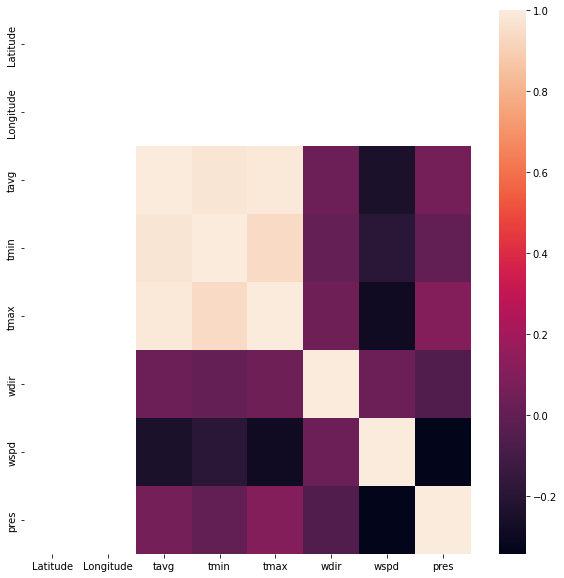

In [25]:
df_correlation = dfDenmark.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_correlation)


📈
# Create the model using Multivariable Linear Regression (MLR)
By setting the X to our predictors, and y to our response variable we can train a model on our desired test size by creating our x and y train and test values with the train_test_split function. We create a model "lin_reg_Model" with the LinearRegression() function and fit our trained x and y values on it. We then test our mean squarred error on our "X_test" using the y_test. The correlation makes helps us choose labels that would not create an under or overfit for the model

In [48]:
X = dfDenmark[['wspd', 'tavg', 'tmin', 'tmax', 'wdir']]
y = dfDenmark['pres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lin_reg_Model = LinearRegression()
lin_reg_Model.fit(X_train,y_train)

pred = lin_reg_Model.predict(X_test)

meanSquaredError = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error of pressure prediction is: {meanSquaredError:4.2} ({meanSquaredError/np.mean(pred)*100:3.2}%)')

Mean error of pressure prediction is:  9.3 (0.92%)


📈
# Printing coeeficients and intercept
We use the coeficients to get an idea about the effect on each parameter on their direction of their relationship between the predictor (5 labels) and response (1 label).
We also print our intercept to gain knowledge about the pressure if all predictors are det to 0. (note that a 0 on wind direction would equal a direction of North, thus wind direction newer has a real 0 value, unless the wind speed is equal to 0 since no speed means no movement)

In [6]:
modelIntercept = lin_reg_Model.intercept_
modelCoefValues = lin_reg_Model.coef_
print("Interceptvalue is equal to: ", modelIntercept)
print("Coeficent values are equal to: ", modelCoefValues)

Interceptvalue is equal to:  1020.215042272173
Coeficent values are equal to:  [-0.46005738  0.19024671 -1.34732447  0.8907042  -0.00927262]


📦✅
# Using the model
By Using the models variable we are able to pass the models prediction to a variable. We use an array of the values as predictors
We calculate the average temp adding tmin and tmax together divided by two. This is not ideal since there is 24 hours in one day and we should ideally take the cumulative measurements. The data does not give indications of how the average temperature is measured. Therefore, i have calculated tavg as the average of max and min value of the temperature.

In [7]:
windspeed = 8
tmin = 5
tmax = 16
averageTemp = (tmin + tmax) / 2
windDirection = 180
pressure = lin_reg_Model.predict([[windspeed, tmin, tmax, averageTemp, windDirection]])
print('predicted pressure using linear regression is: ', pressure)

predicted pressure using linear regression is:  [1003.61194819]


c:\Users\Anders\miniforge3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


♻️🚀
# Export of model
We use pickle to dump our model into a file that can be read in our python app. We create our file and use the "dump" function to deposit the model in the file. The model is intepretet as an object that is dumped into the file. we use the "write binary (wb)" and "read binary (rb)" to express that the file should be written and read in binary mode. We pass five "0" to the model to ensure that it has been "dumped" correct since this should be equal to the intercept value from the model.

In [39]:
import pickle
model_filename = 'pressurePredictionCopenhagen-Model.pkl'
pickle.dump(lin_reg_Model, open(model_filename,'wb'))
#Load previoulsy dumped model
model = pickle.load(open('pressurePredictionCopenhagen-Model.pkl','rb'))
pickleModelPredict = lin_reg_Model.predict([[0,0,0,0,0]])
#Simple unittest to ensure the exported model gives the same results as the intercept.
if pickleModelPredict == modelIntercept:
    print("<----------- Unit test for correct prediction ----------->")
    print("Exported Model predict correct value with a difference of ", pickleModelPredict-modelIntercept)
elif pickleModelPredict != modelIntercept:
    print("<----------- Unit test for wrong prediction ----------->")
    print("Exported Model does not return same value as the intercept with a difference of ", pickleModelPredict-modelIntercept)
    

<----------- Unit test for correct prediction ----------->
Exported Model predict correct value with a difference of  [0.]


c:\Users\Anders\miniforge3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
